In [1]:
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from scipy import stats as ss

warnings.filterwarnings( 'ignore' )

In [5]:
%matplotlib inline
%pylab inline

plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 10

Populating the interactive namespace from numpy and matplotlib


In [3]:
df5 = pd.read_pickle('df4.pkl')
num_attributes = pd.read_pickle('num_attributes.pkl')
cat_attributes = pd.read_pickle('cat_attributes2.pkl')

# 5.0 Data Preparation

Para saber qual tipo de preparação vamos aplicar para cada uma das variáveis, precisamos observar as distribuições de cada uma delas e identificar quais têm distribuições normais (gaussiana) ou outras (exponencial, bimodal, t-student, F, chi-squared, fatigue life, binomial, poisson, uniforme)

## 5.1 Standartization

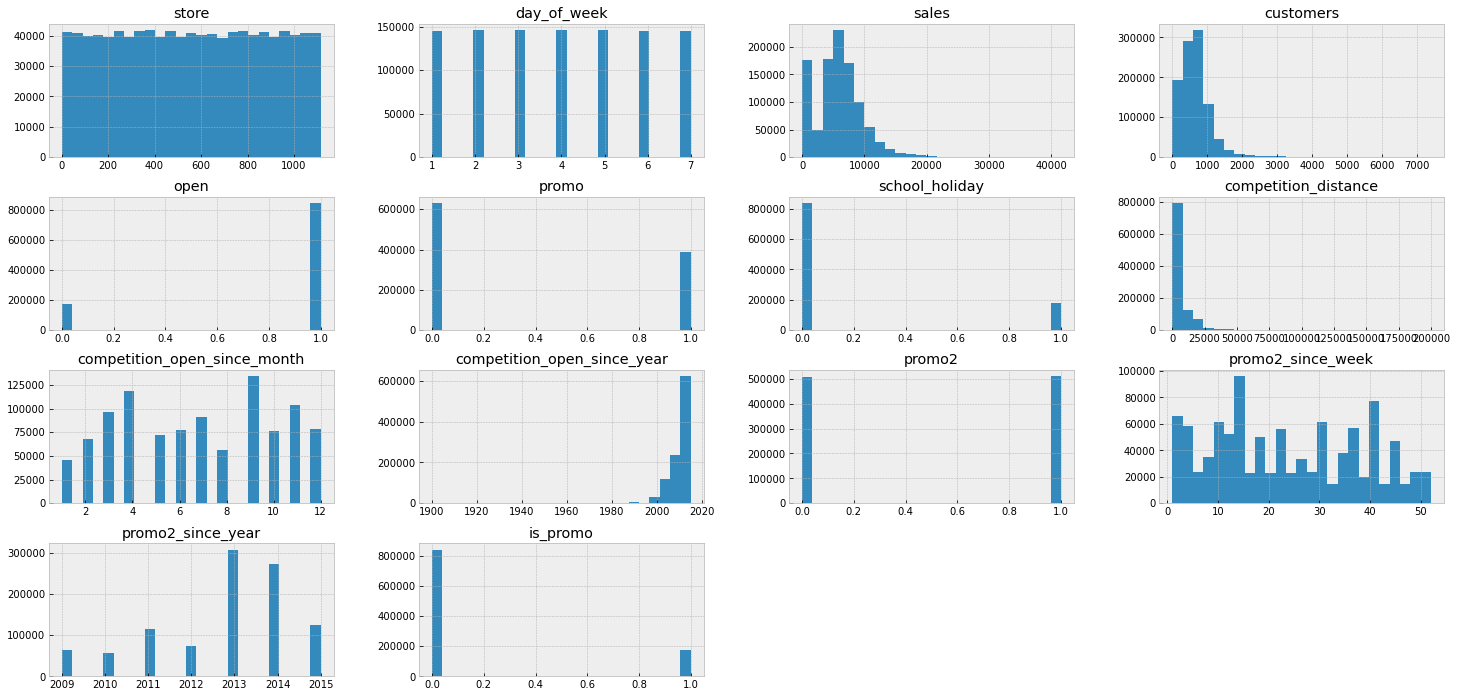

In [6]:
num_attributes.hist( bins= 25 );

Como não identificamos nenhuma variável com distribuição normal, não será feita a standardization.

## 5.2 Rescaling

In [8]:
a=df5.select_dtypes(include=['int64','float'])

In [9]:
a.head()

,store,day_of_week,sales,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,competition_time_month,promo_time_week
0,1,5,5263,1,1,1270.0,9,2008,0,31,2015,0,2015,7,31,84,0
1,2,5,6064,1,1,570.0,11,2007,1,13,2010,1,2015,7,31,94,279
2,3,5,8314,1,1,14130.0,12,2006,1,14,2011,1,2015,7,31,105,226
3,4,5,13995,1,1,620.0,9,2009,0,31,2015,0,2015,7,31,71,0
4,5,5,4822,1,1,29910.0,4,2015,0,31,2015,0,2015,7,31,4,0


Para decidir se vamos aplicar min-max scaler ou robust scaler, precisamos basicamente verificar a presença ou não de outliers.

In [19]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler

<AxesSubplot:xlabel='competition_distance'>

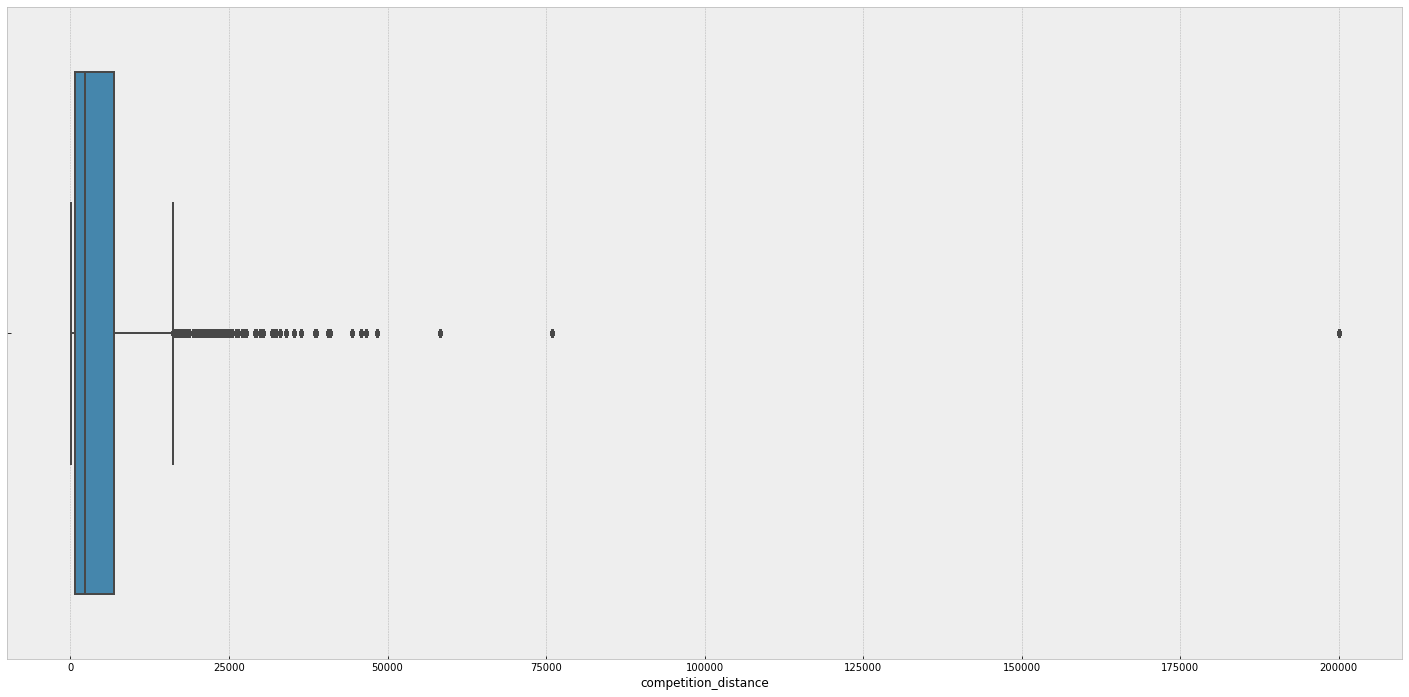

In [11]:
# competition distance
sns.boxplot(df5['competition_distance'])

In [14]:
rs = RobustScaler()
df5['competition_distance']=rs.fit_transform(df5[['competition_distance']].values)

<AxesSubplot:xlabel='competition_time_month'>

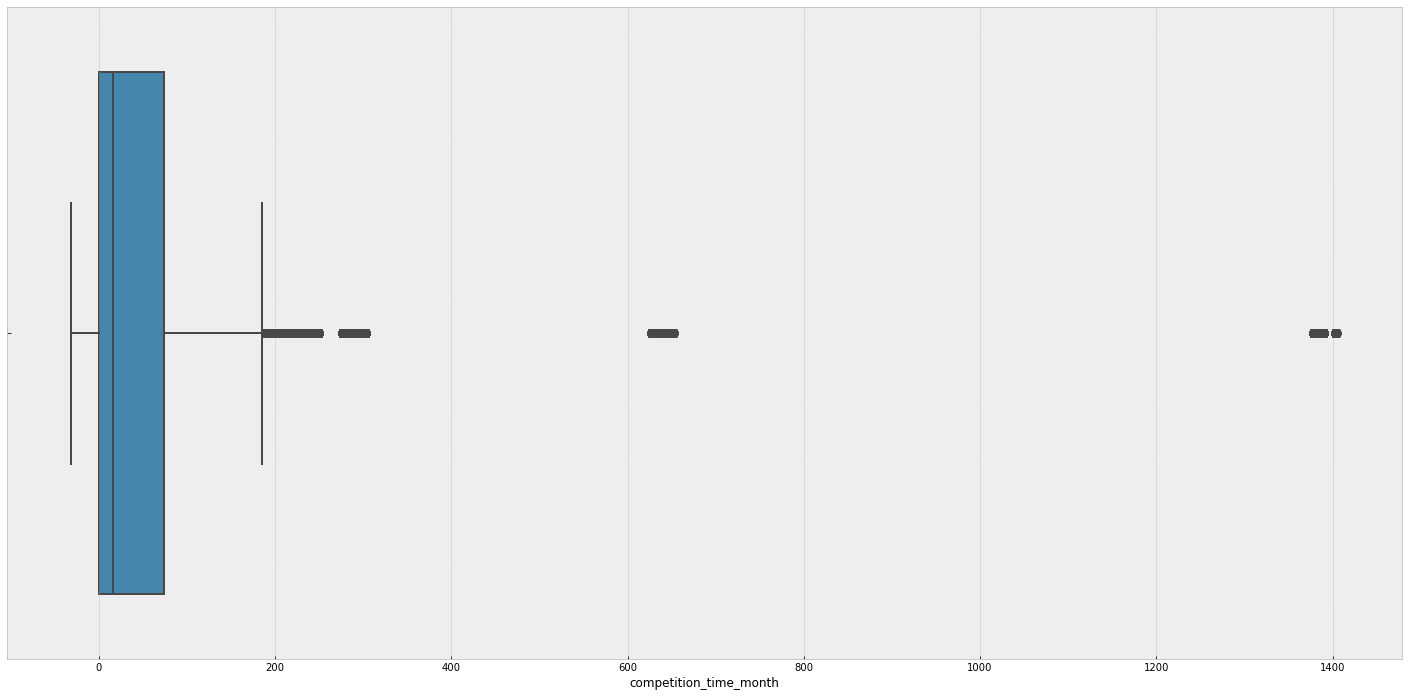

In [16]:
# competition time month
sns.boxplot(df5['competition_time_month'])

In [17]:
df5['competition_time_month']=rs.fit_transform(df5[['competition_time_month']].values)

<AxesSubplot:xlabel='promo_time_week'>

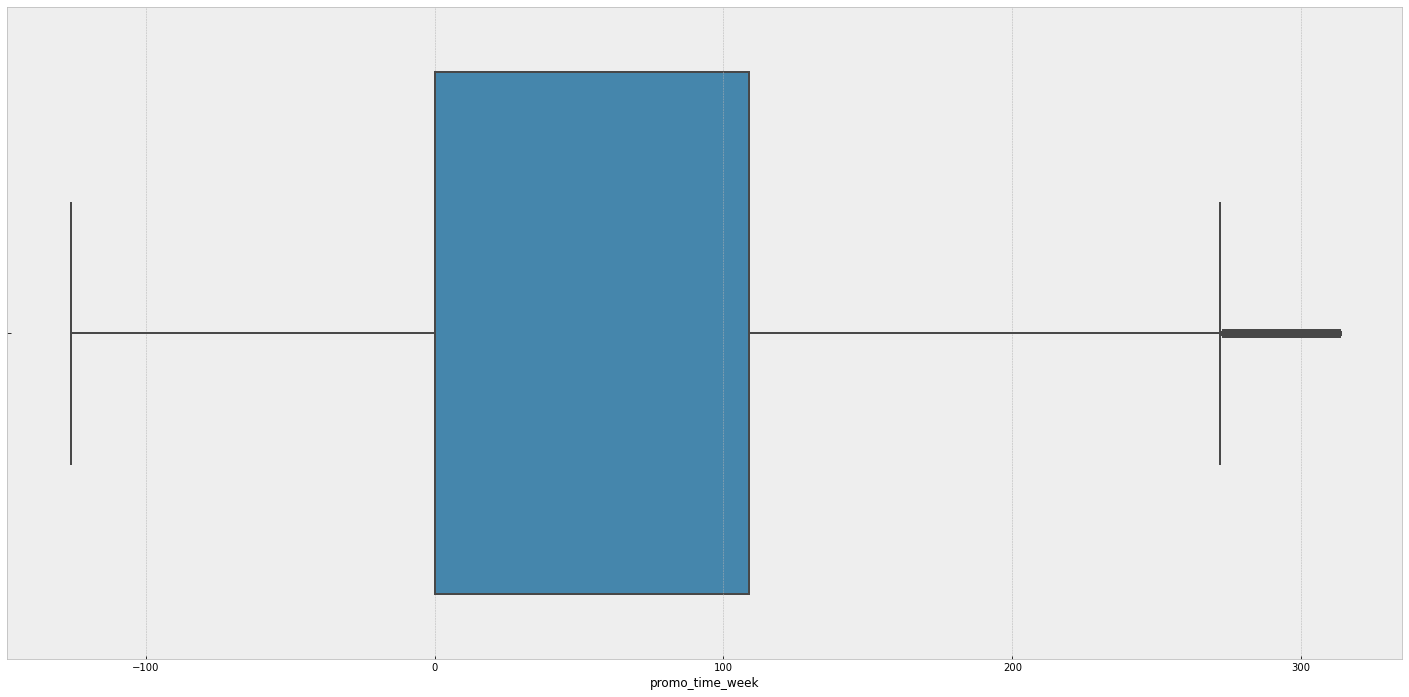

In [18]:
# promo time week
sns.boxplot(df5['promo_time_week'])

In [20]:
mms = MinMaxScaler()

In [21]:
df5['promo_time_week']=mms.fit_transform(df5[['promo_time_week']].values)

<AxesSubplot:xlabel='year'>

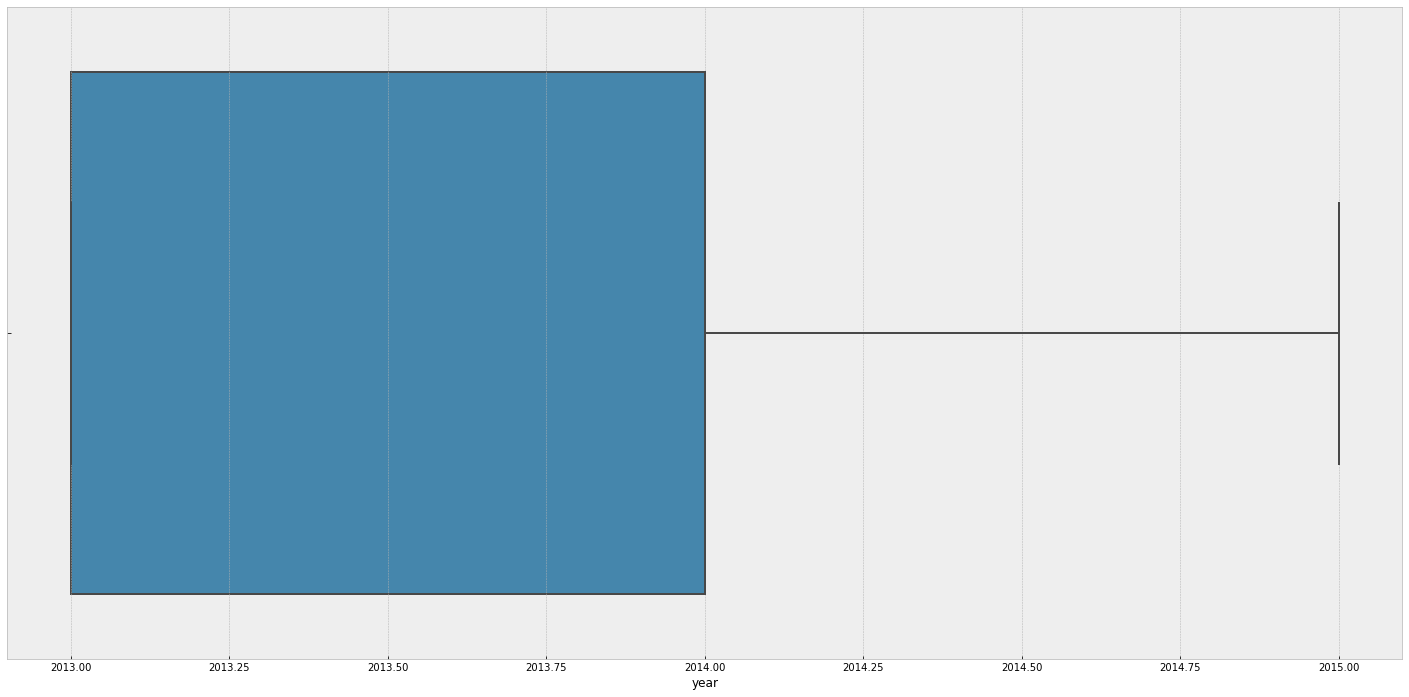

In [22]:
# year
sns.boxplot(df5['year'])

In [23]:
df5['year']=mms.fit_transform(df5[['year']].values)

## 5.3 Wrangling

### 5.3.1 Enconding

In [40]:
df5.head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,-0.170968,...,0,1.0,7,31,31,2015-30,2008-09-01,0.918919,2015-07-27,0.287016
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,-0.283871,...,1,1.0,7,31,31,2015-30,2007-11-01,1.054054,2010-03-22,0.922551
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,1.903226,...,1,1.0,7,31,31,2015-30,2006-12-01,1.202703,2011-03-28,0.801822
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,-0.275806,...,0,1.0,7,31,31,2015-30,2009-09-01,0.743243,2015-07-27,0.287016
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,4.448387,...,0,1.0,7,31,31,2015-30,2015-04-01,-0.162162,2015-07-27,0.287016


In [42]:
# state holiday - state nature (moments in which the result changes)

# ONEHOT ENCODING
df5=pd.get_dummies(df5, prefix=['state_holiday'],columns=['state_holiday'])

In [43]:
df5.head()

,store,day_of_week,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,...,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public_holiday,state_holiday_regular_day
0,1,5,2015-07-31,5263,1,1,c,basic,-0.170968,9,...,31,2015-30,2008-09-01,0.918919,2015-07-27,0.287016,0,0,0,1
1,2,5,2015-07-31,6064,1,1,a,basic,-0.283871,11,...,31,2015-30,2007-11-01,1.054054,2010-03-22,0.922551,0,0,0,1
2,3,5,2015-07-31,8314,1,1,a,basic,1.903226,12,...,31,2015-30,2006-12-01,1.202703,2011-03-28,0.801822,0,0,0,1
3,4,5,2015-07-31,13995,1,1,c,extended,-0.275806,9,...,31,2015-30,2009-09-01,0.743243,2015-07-27,0.287016,0,0,0,1
4,5,5,2015-07-31,4822,1,1,a,basic,4.448387,4,...,31,2015-30,2015-04-01,-0.162162,2015-07-27,0.287016,0,0,0,1


In [45]:
# store_type - there is no order, it is a mere label

# LABEL ENCODING
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df5['store_type']=le.fit_transform(df5['store_type'])

In [46]:
df5.head()

,store,day_of_week,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,...,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public_holiday,state_holiday_regular_day
0,1,5,2015-07-31,5263,1,1,2,basic,-0.170968,9,...,31,2015-30,2008-09-01,0.918919,2015-07-27,0.287016,0,0,0,1
1,2,5,2015-07-31,6064,1,1,0,basic,-0.283871,11,...,31,2015-30,2007-11-01,1.054054,2010-03-22,0.922551,0,0,0,1
2,3,5,2015-07-31,8314,1,1,0,basic,1.903226,12,...,31,2015-30,2006-12-01,1.202703,2011-03-28,0.801822,0,0,0,1
3,4,5,2015-07-31,13995,1,1,2,extended,-0.275806,9,...,31,2015-30,2009-09-01,0.743243,2015-07-27,0.287016,0,0,0,1
4,5,5,2015-07-31,4822,1,1,0,basic,4.448387,4,...,31,2015-30,2015-04-01,-0.162162,2015-07-27,0.287016,0,0,0,1


In [47]:
# assortment - hierarchical nature (basic, extended etc..)

# ORDINAL ENCODING
df5['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

In [48]:
assortment_dict={
    'basic':1,
    'extra':2,
    'extended':3
}
df5['assortment']=df5['assortment'].map(assortment_dict)

In [49]:
df5.head()

,store,day_of_week,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,...,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public_holiday,state_holiday_regular_day
0,1,5,2015-07-31,5263,1,1,2,1,-0.170968,9,...,31,2015-30,2008-09-01,0.918919,2015-07-27,0.287016,0,0,0,1
1,2,5,2015-07-31,6064,1,1,0,1,-0.283871,11,...,31,2015-30,2007-11-01,1.054054,2010-03-22,0.922551,0,0,0,1
2,3,5,2015-07-31,8314,1,1,0,1,1.903226,12,...,31,2015-30,2006-12-01,1.202703,2011-03-28,0.801822,0,0,0,1
3,4,5,2015-07-31,13995,1,1,2,3,-0.275806,9,...,31,2015-30,2009-09-01,0.743243,2015-07-27,0.287016,0,0,0,1
4,5,5,2015-07-31,4822,1,1,0,1,4.448387,4,...,31,2015-30,2015-04-01,-0.162162,2015-07-27,0.287016,0,0,0,1


In [ ]:
# CÍCLICAS
# day of week
# month
# day
# week of year

In [ ]:
df4.to_pickle('df4.pkl')
num_attributes.to_pickle('num_attributes.pkl')
a.to_pickle('cat_attributes2.pkl')